# Handwriting recognition


## Data import and visualization


Import the MNIST train dataset ([https://en.wikipedia.org/wiki/MNIST_database](https://en.wikipedia.org/wiki/MNIST_database))


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# This dataset is contained in the sample data directory of Google Colab online runtimes
data = np.genfromtxt("data/mnist_train_small.csv", delimiter=",")
data.shape

(20000, 785)

Store the data in a matrix and the labels in a vector


In [2]:
labels_full = data[:, 0]
print(labels_full)
A_full = data[:, 1:].transpose()
labels_full.shape, A_full.shape

[6. 5. 7. ... 2. 9. 5.]


((20000,), (784, 20000))

Visualize the first 30 pictures with the corresponding labels


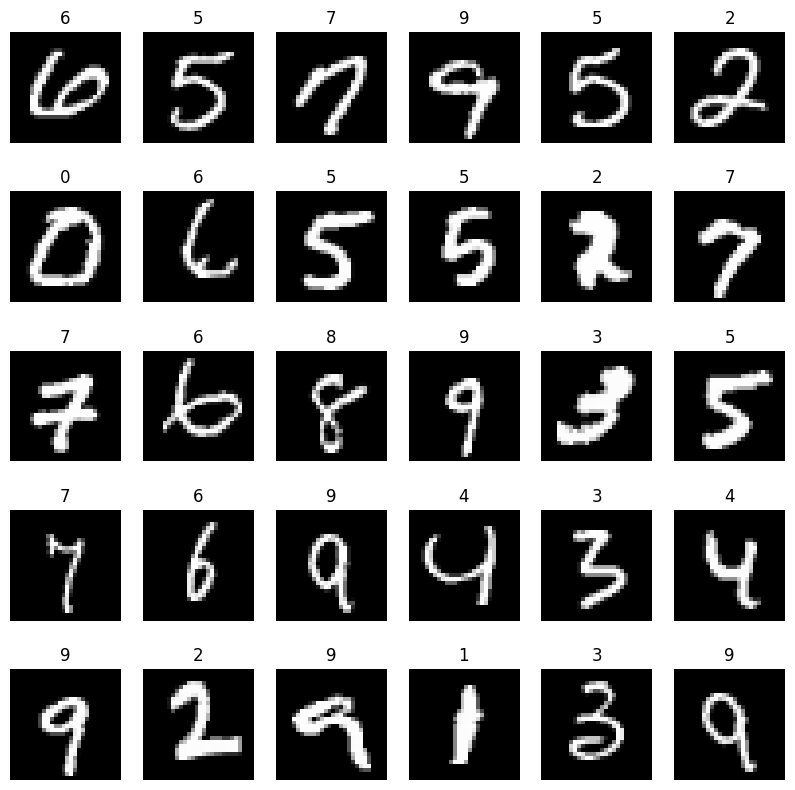

In [3]:
fig, axs = plt.subplots(5, 6, figsize=(10, 10))
axs = axs.flatten()
for i in range(30):
    axs[i].imshow(np.reshape(A_full[:, i], (28, 28)), cmap="gray")
    axs[i].axis("off")
    axs[i].set_title("%d" % labels_full[i])

Visualize the first 30 pictures corresponding the the digit "9"


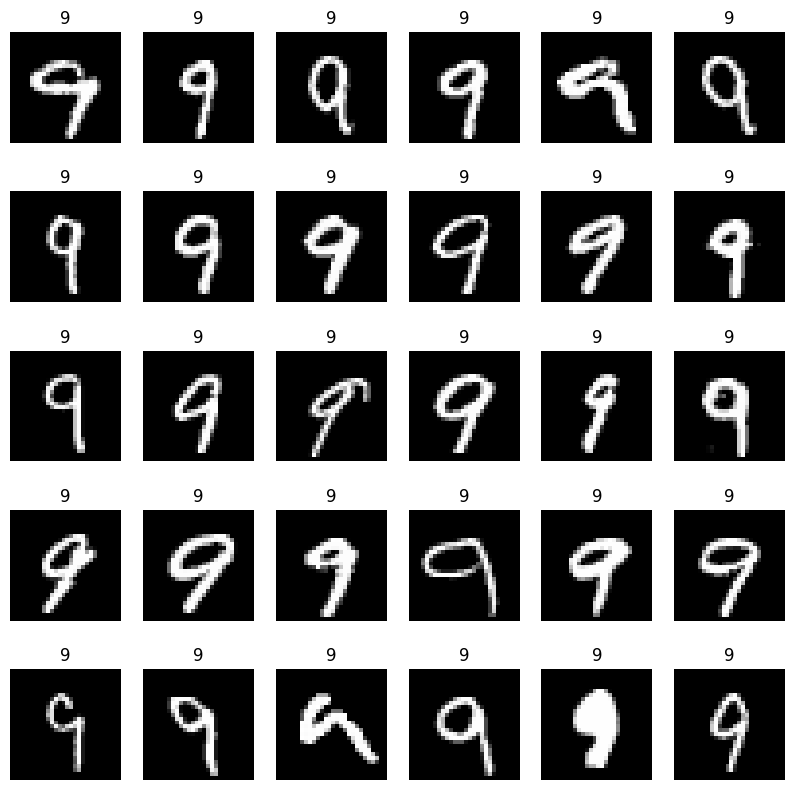

In [4]:
A_nine = A_full[:, labels_full == 9]

fig, axs = plt.subplots(5, 6, figsize=(10, 10))
axs = axs.flatten()
for i in range(30):
    axs[i].imshow(np.reshape(A_nine[:, i], (28, 28)), cmap="gray")
    axs[i].axis("off")
    axs[i].set_title("9")

### Classification of two digits (0 and 9)

We now focus on the digits 0 and 9 only. Build a reduced training dataset containing only images corresponding to these digits.


In [5]:
A_reduced = A_full[:, np.logical_or(labels_full == 0, labels_full == 9)]
labels_reduced = labels_full[np.logical_or(labels_full == 0, labels_full == 9)]

Plot the first 30 training images.


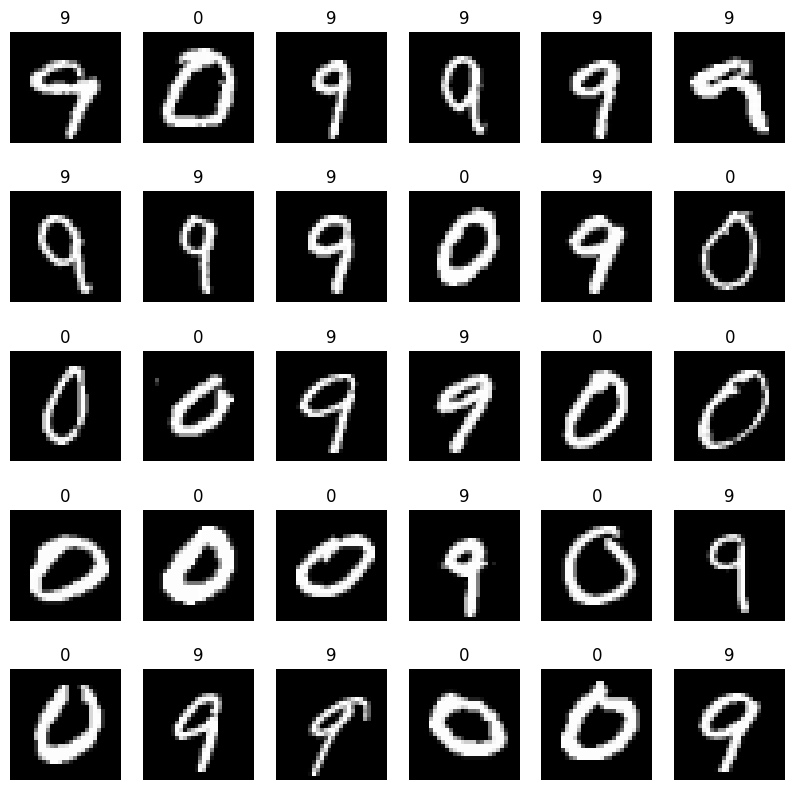

In [6]:
fig, axs = plt.subplots(5, 6, figsize=(10, 10))
axs = axs.flatten()
for i in range(30):
    axs[i].imshow(np.reshape(A_reduced[:, i], (28, 28)), cmap="gray")
    axs[i].axis("off")
    axs[i].set_title("%d" % labels_reduced[i])

Compute and visualize the average of the training data


(-0.5, 27.5, 27.5, -0.5)

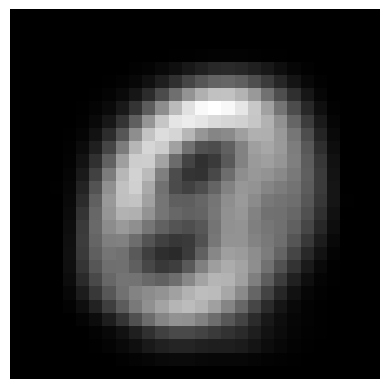

In [7]:
A_reduced_mean = np.mean(A_reduced, axis=1)
A_reduced_mean.shape

fig, ax = plt.subplots(1, 1)
ax.imshow(np.reshape(A_reduced_mean, (28, 28)), cmap="gray")
ax.axis("off")

Perform PCA on the data. Then, plot the trend of

- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$


Text(0.5, 1.0, 'Explained variance')

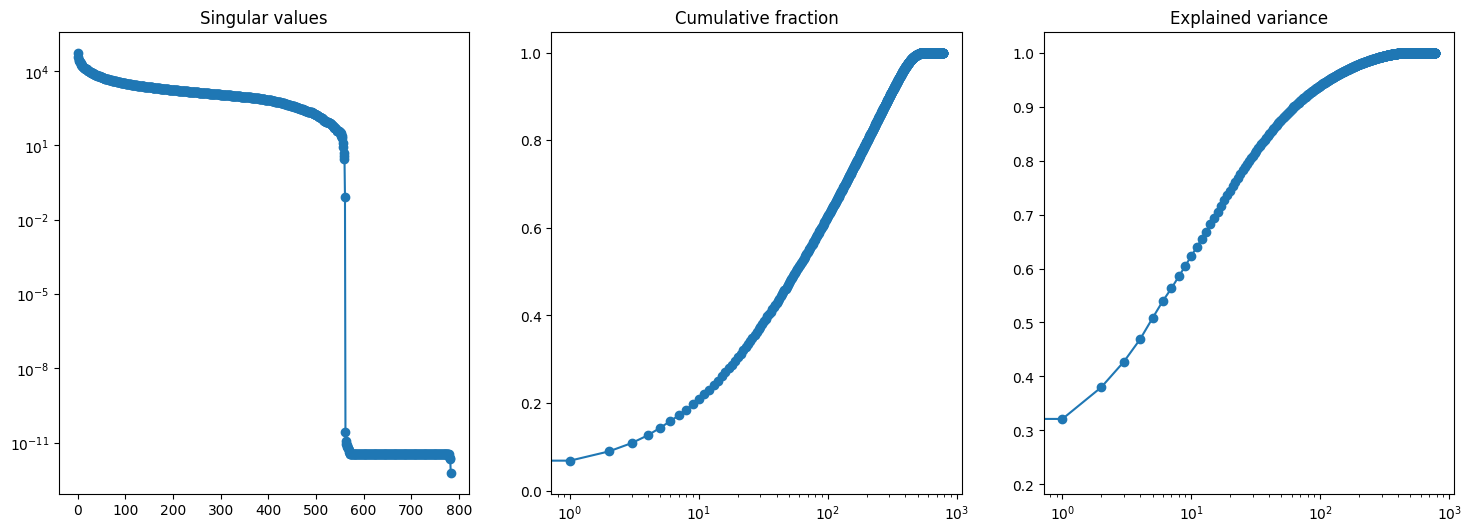

In [8]:
A_reduced_bar = A_reduced - A_reduced_mean[:, np.newaxis]
U, s, VT = np.linalg.svd(A_reduced_bar, full_matrices=False)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].semilogy(s[:], "o-")
axs[0].set_title("Singular values")
axs[1].semilogx(np.cumsum(s[:]) / np.sum(s[:]), "o-")
axs[1].set_title("Cumulative fraction")
axs[2].semilogx(np.cumsum(s**2) / np.sum(s**2), "o-")
axs[2].set_title("Explained variance")

Visualize the first 30 principal axes


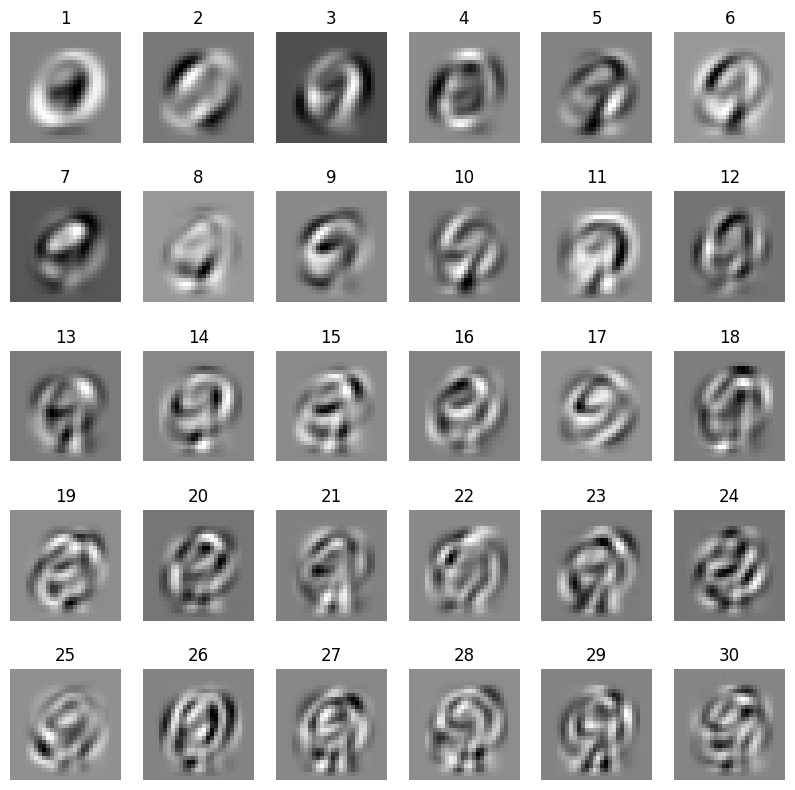

In [9]:
fig, axs = plt.subplots(5, 6, figsize=(10, 10))
axs = axs.flatten()
for i in range(30):
    q = 0
    axs[i].imshow(np.reshape(U[:, q + i], (28, 28)), cmap="gray")
    axs[i].axis("off")
    axs[i].set_title("%d" % (q + i + 1))

Compute the first two principal components corresponding to the first image


In [10]:
PHI = U.T @ (A_reduced_bar)

# first principal component of the first image
print(PHI[0, 0])
# second principal component of the first image
print(PHI[1, 0])

# or equivalently

print(np.inner(U[:, 0], A_reduced_bar[:, 0]))
print(np.inner(U[:, 1], A_reduced_bar[:, 0]))

-529.0964148086613
-580.8608501624368
-529.0964148086612
-580.8608501624369


Define a matrix corresponding all the principal components of all the images, and check the result of the previous point


In [11]:
# I have already computed PHI as in the previuos point
# PHI = U.T @ A_reduced_bar
PHI.shape

print(labels_reduced[0])

9.0


Create a scatterplot for the first 2 principal components of all the training images, grouped by label. Consider only the first 500 pictures.


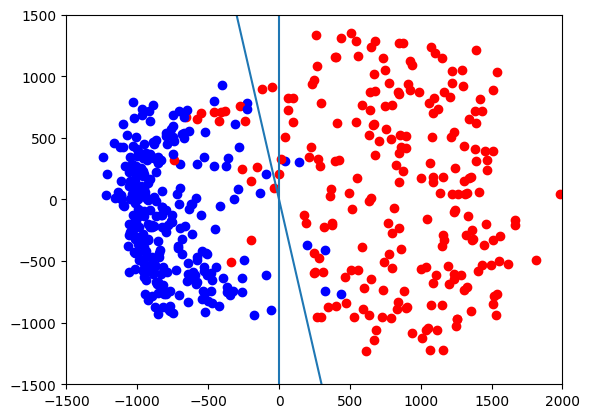

In [38]:
x = np.linspace(-2000, 2000, 2000)

for i in range(500):
    if labels_reduced[i] == 0:
        color = "r"
    else:
        color = "b"
    # if i == 0:
    #     color = "g"
    plt.scatter(PHI[0, i], PHI[1, i], color=color)

plt.ylim(top=1500, bottom=-1500)
plt.xlim(right=2000, left=-1500)

plt.plot(x, -5 * x)
plt.axvline(0)

Define a classifier, by fixing a threshold on the first principal component. Then, test the classifier on the MNIST test dataset. Compute the number of true/false positive/negative for both the digits (confusion matrix) and the accuracy of the classifier.


Read data from file


In [13]:
# read data from file
test_data = np.genfromtxt("data/mnist_test.csv", delimiter=",")
print(test_data.shape)

# perform PCA on the test data

(10000, 785)


Store data in a matrix, labels in a vector


In [14]:
# store data in a matrix, labels in a vector
test_labels = test_data[:, 0]
T_full = test_data[:, 1:].transpose()

print(test_labels.shape)
print(T_full.shape)

(10000,)
(784, 10000)


Extrapolate only images related to digits 0 and 9


In [15]:
# extrapolate only images related to digits 0 and 9
T = T_full[:, np.logical_or(test_labels == 0, test_labels == 9)]
labels = test_labels[np.logical_or(test_labels == 0, test_labels == 9)]

print(T.shape)
print(labels.size)
labels

(784, 1989)
1989


array([0., 9., 9., ..., 0., 9., 0.])

Perform PCA on test data


In [20]:
# Center data
Tmean = np.mean(T, axis=1)
Tbar = T - Tmean[:, np.newaxis]

# Perform SVD on centered data
# tU, ts, tVT = np.linalg.svd(Tbar)

# RMK RMK RMK RMK RMK
# here I'm using matrix U obtained from the SVD of
# the TRAINING DATA, not of the test data
tPHI = U.T @ Tbar
tPHI.shape

(784, 1989)

Get only the weights of the first principal component


In [30]:
pc1 = tPHI[0, :]
pc2 = tPHI[1, :]
pc1.shape, pc2.shape

((1989,), (1989,))

Classify these weights


In [23]:
output_labels = np.empty(labels.shape).astype(int)
# output_labels = np.where(weights > 0, 9, 0)
# output_labels

output_labels[pc1 <= 0] = 9
output_labels[pc1 > 0] = 0
output_labels

/tmp/ipykernel_9928/647670781.py:1: RuntimeWarning: invalid value encountered in cast
  output_labels = np.empty(labels.shape).astype(int)


array([0, 9, 9, ..., 0, 9, 0])

Compute the number of mispredictions and the accuracy


In [32]:
def computeAccuracy(output_labels):
    true9 = np.sum(np.logical_and(output_labels == 9, labels == 9))
    true0 = np.sum(np.logical_and(output_labels == 0, labels == 0))
    false9 = np.sum(np.logical_and(output_labels == 9, labels == 0))
    false0 = np.sum(np.logical_and(output_labels == 0, labels == 9))

    print("true 9: %d" % true9)
    print("true 0: %d" % true0)
    print("false 9: %d" % false9)
    print("false 0: %d" % false0)

    accuracy = (true9 + true0) / len(labels) * 100

    print("The classifier has %1.2f percent of accuracy" % accuracy)

In [33]:
computeAccuracy(output_labels)

true 9: 979
true 0: 930
false 9: 50
false 0: 30
The classifier has 95.98 percent of accuracy


In [34]:
def f(val):
    return -5 * val

In [35]:
output_labels_line = np.empty(labels.shape).astype(int)
output_labels_line[f(pc1) > pc2] = 9
output_labels_line[f(pc1) <= pc2] = 0

computeAccuracy(output_labels_line)

true 9: 982
true 0: 925
false 9: 55
false 0: 27
The classifier has 95.88 percent of accuracy
